In [1]:
import pandas as pd
import ast
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('csv_results/result_6.csv')
df

,seed,True,ARMA,Informer,Informer_para,RNN
0,1,"[-0.44777366358533155, -0.10574035166322028, 0...","[-0.6517749350971669, 0.05570744061967592, 0.0...","[-0.03298172, 0.039005306, 0.26032183, 0.80336...","(50, 10)","[-0.5840141773223877, 0.19973832368850708, -0...."
1,9,"[2.3564076519401875, 0.08026659789866364, -1.0...","[1.0584677749552682, 1.4923364637618968, -1.12...","[1.5104693, 1.4692116, -0.9941986, -1.0142472,...","(50, 10)","[1.1644079685211182, 1.5646331310272217, -1.08..."
2,2,"[1.117955292270915, -0.5518213055246787, -1.80...","[-0.15190144148019213, 0.7659468546665001, -1....","[-0.22214465, 0.07454632, -1.0666792, -1.29495...","(50, 10)","[-0.13417233526706696, 0.4682311415672302, -0...."
3,8,"[-0.1459271072689517, -0.39088531478562016, -0...","[-0.015614548841277082, -0.17930241731321095, ...","[-0.33166048, -0.5825521, -0.7700061, -0.76479...","(50, 10)","[0.1894504725933075, -0.28021323680877686, -0...."
4,4,"[2.067124107644449, 2.5686384206666197, 1.5486...","[-0.6934151272640436, 2.3776218575252788, 0.77...","[-0.06323052, 1.3403212, 0.83711505, 0.1531677...","(50, 10)","[-0.5013954639434814, 2.32684063911438, 0.7979..."
...,...,...,...,...,...,...
95,99,"[0.8573606561197087, 2.6652747225376228, 2.553...","[-0.5237227771612865, 1.2423107810850893, 1.65...","[-0.6061447, 0.6290896, 1.080922, 1.0156028, -...","(50, 10)","[-0.49163150787353516, 1.1656317710876465, 1.7..."
96,82,"[1.1636955896271974, 0.551543475212207, -1.597...","[0.12830905270612536, 0.8050191121429633, -0.0...","[0.39865232, 1.2723175, 0.4081983, -1.5604682,...","(50, 10)","[0.2125464826822281, 0.8203306198120117, -0.07..."
97,74,"[-0.5623526981463747, 0.37797869313613547, 0.4...","[-1.2582413580074092, 0.12240112919997226, 0.4...","[-0.7661426, -0.39758077, 0.92838967, -0.88591...","(50, 10)","[-1.0462546348571777, -0.1191578209400177, 0.3..."
98,88,"[0.22461653339957438, 1.318030320057857, -0.08...","[0.059506809684996, 0.44607951482876007, 0.920...","[0.19983456, 0.2258161, 0.63548416, -0.9331082...","(50, 10)","[-0.055925436317920685, 0.4496340751647949, 0...."


In [3]:
arma_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['ARMA'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
informer_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['Informer'].apply(ast.literal_eval).to_list()),multioutput='raw_values')
rnn_mse = mean_squared_error(np.array(df['True'].apply(ast.literal_eval).to_list()),np.array(df['RNN'].apply(ast.literal_eval).to_list()),multioutput='raw_values')


In [4]:
informer_select = np.array(df['Informer_para'].apply(ast.literal_eval).to_list())[:,0]
informer_select

array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
       50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50])

In [6]:
arma_mse

array([0.95996323, 0.96093931, 1.0060377 , 0.85977669, 0.83586359,
       0.86325898, 0.88492409, 0.79301731, 0.92128928, 1.22989937])

In [7]:
informer_mse

array([1.13299498, 1.18678647, 1.24813398, 0.98487264, 1.21092456,
       1.0193709 , 0.96700452, 0.8911507 , 1.14933608, 1.41987   ])

In [8]:
rnn_mse

array([1.05691012, 1.0064944 , 1.0546127 , 0.85441096, 0.85607217,
       0.94511965, 0.8527078 , 0.78963734, 0.93692413, 1.25320325])

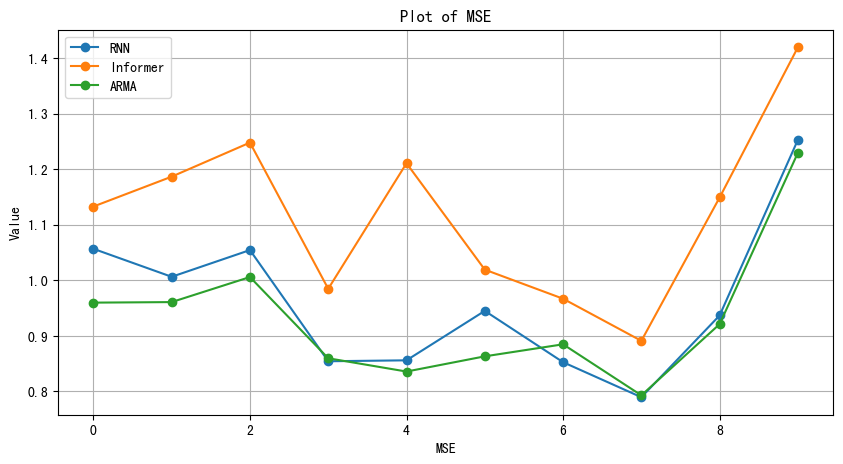

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the array
plt.figure(figsize=(10, 5))
plt.plot(rnn_mse,label = 'RNN', marker='o')  # Using 'o' as a marker for each data point
plt.plot(informer_mse,label = 'Informer', marker='o')  # Using 'o' as a marker for each data point
plt.plot(arma_mse,label = 'ARMA', marker='o')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()


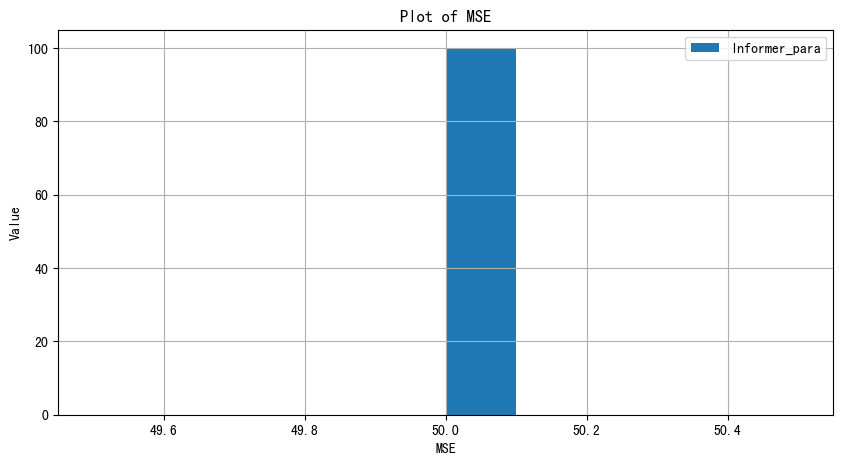

In [10]:

# Plotting the array
plt.figure(figsize=(10, 5))
plt.hist(informer_select,label = 'Informer_para')  # Using 'o' as a marker for each data point
plt.title('Plot of MSE')
plt.xlabel('MSE')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.show()